In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# (a)

In [2]:
simulator = Aer.get_backend('qasm_simulator')

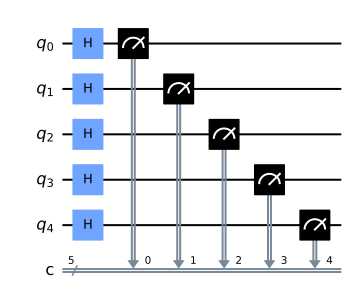

In [3]:
n = 5
qc = QuantumCircuit(n, n)

qc.h([i for i in range(n)])
qc.measure([i for i in range(n)], [i for i in range(n)])
    
qc.draw()

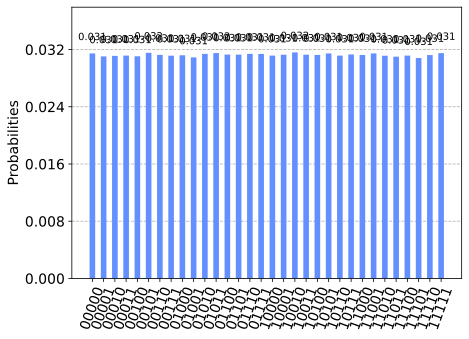

In [4]:
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Here, it's shown that each number between 0 and 2n − 1 are almost uniformly distributed. There is still some difference due to quantum error, though.

### Now, let's generate a (almost) random number.

In [5]:
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts()
print(counts)

{'11111': 1}


### Here it is!

# (b)

In [6]:
from qiskit import IBMQ
from dotenv import load_dotenv
import os

load_dotenv()
API_TOKEN = os.environ.get("API_TOKEN")

IBMQ.enable_account(API_TOKEN)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider('ibm-q')
devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= n
                            and not x.configuration().simulator
                            and x.status().operational==True
                            and x.name()!='ibmq_bogota'
                            and x.name()!='ibmq_lima'
                            and x.name()!='ibmq_belem'
                            and x.name()!='ibmq_quito'
                            and x.name()!='ibmq_manila')
backend = least_busy(devices)
print(backend)

ibmq_santiago


In [8]:
job = execute(qc, backend, shots=1, memory=True)

In [9]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [10]:
result = job.result()
memory = result.get_memory()
print(memory)

['10110']


### There it is. From a real quantum machine.

In [11]:
IBMQ.disable_account()